# **Analysis of Diabetic Patient Data**

## Business Understanding

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases.** The dataset consist of several medical predictor **(independent)** variables and one target **(dependent)** variable - Outcome. 

Independent variables include:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- Two-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Outcome: Class variable (0 or 1).

Questions:

1. Is there a relationship between age & diabetes?
2. Is there a relationship between number of pregnancies & diabetes?
3. Are people with high blood pressure prone to diabetes? 
4. Are obese people prone to diabetes? (BMI > 30)

In [1]:
# Import libraries used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Data Understanding

In [2]:
# Upload the dataset
dbts = pd.read_csv('data/diabetes.csv')

In [3]:
# Let's see how many records & columns the dataset has
dbts.shape

(768, 9)

In [4]:
# Let's see the column data types
# Apparently there is no null values -> There might be values written as "0" or "N/A", which should be considered as missing values
dbts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Let's have a look at some descriptive statistics of the dataset
dbts.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above statistical table, by looking at the min value of each column, it can be witnessed that there are "0" values in several columns (such as Glucose, Blood Pressure or BMI) that does not make sense.<br/>
Hence, it means those value are missing and we should use a method to impute those missing values.

## Data Preparation

In [6]:
# Columns that should have value > 0 are listed in the nonzero_independent list so as to prepare for data imputation
nonzero_independents = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
independents = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
# Replace these zero values with NaN
dbts[nonzero_independents] = dbts[nonzero_independents].replace({0:np.nan})
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [8]:
# Double check the missing values count
dbts.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Fill missing values with mean column values
dbts['Glucose'].replace({np.nan:dbts['Glucose'].mean()}, inplace=True)
dbts['BloodPressure'].replace({np.nan:dbts['BloodPressure'].mean()}, inplace=True)
dbts['SkinThickness'].replace({np.nan:dbts['SkinThickness'].mean()}, inplace=True)
dbts['Insulin'].replace({np.nan:dbts['Insulin'].mean()}, inplace=True)
dbts['BMI'].replace({np.nan:dbts['BMI'].mean()}, inplace=True)
dbts

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [10]:
# After data imputation, no more "0" values in these below columns
dbts[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].min() ==0

Glucose          False
BloodPressure    False
SkinThickness    False
Insulin          False
BMI              False
dtype: bool

After the data cleaning process, let's dive into the analysis to answer the business questions posed in the first place!

## Evaluation

#### Question 1. Is there a relationship between age & diabetes?

<Axes: xlabel='Outcome', ylabel='Age'>

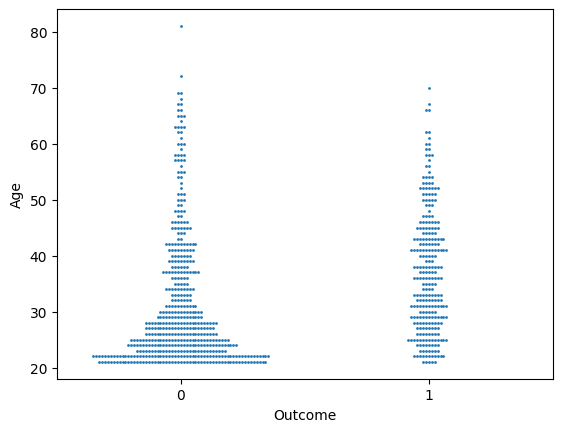

In [11]:
# Using a swarmplot to graph the relationship between age and outcome columns
sns.swarmplot(x='Outcome', y='Age', data=dbts, size=2, alpha=1)

In the graph above, each dot represent one record in the dataset or one patient.<br/>
The x axis is the Outcome column, with "0" as patients without diabeties and "1" as patients with diabetes.<br/>
The y axis is the Age band column.<br/>
Looking at the graph, it is noticeable that there is **no apparent correlation** between age and diabetes. Diabetes can happen to people of any age.

#### Question 2. Is there a relationship between number of pregnancies & diabetes?

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

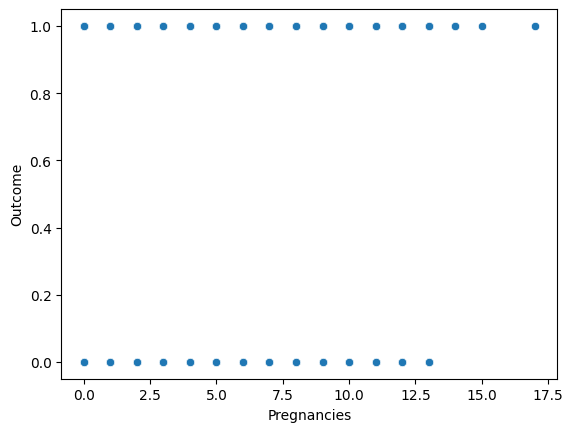

In [12]:
# Using a scatterplot to graph the relationship between number of pregnancies and the outcome columns
sns.scatterplot(data=dbts, x='Pregnancies', y='Outcome')

In the graph above, the x axis is the Number of Pregnancies column, with values ranging from 0 to 17.<br/>
The y axis is the Outcome column, with "0.0" as patients without diabeties and "1.0" as patients with diabetes.<br/>
Different from the swarmplot, if more than 1 patient share the same information (similar Outcome value and Number of Pregnancies), they will all be represented as one single blue dot in the graph.
It is noticeable that there is **no apparent correlation** between number of times pregnant and diabetes. 50% of people with diabetes fall between 1-8 times pregnant.

#### Question 3. Are people with high blood pressure prone to diabetes? 

##### Rules to divide blood pressure range
- BloodPressure < 80 then “Normal”
- 80 <= BloodPressure < 90 then "At risk" 
- **90 <= BloodPressure then “High blood pressure”**

In [13]:
# Let's create a separate column to categorize patients based on their Blood Pressure index
def blood_pressure_categorize(x):
    '''
    this function will return the blood pressure category value for each record based on its corresponding blood pressure value
    input: values in column BloodPressure in dbts data frame
    output: corresponding blood pressure category
    '''
    if x < 80: return 'Normal'
    if 80 <= x < 90: return 'At risk'
    if 90 <= x: return 'High blood pressure'

dbts['BloodPressure_Category'] = dbts['BloodPressure'].apply(blood_pressure_categorize)
dbts['BloodPressure_Category']

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
763    Normal
764    Normal
765    Normal
766    Normal
767    Normal
Name: BloodPressure_Category, Length: 768, dtype: object

Instead of comparing the number of diabetic patients among all blood pressure levels, I calculated the percentage of diabetic patients in each blood pressure levels and compared them altogether. This will eliminate the possible bias in the dataset.<br/>
All pie charts will be generated, the insight will be included after the last chart.<br/>
Let's start with patients with normal blood pressure

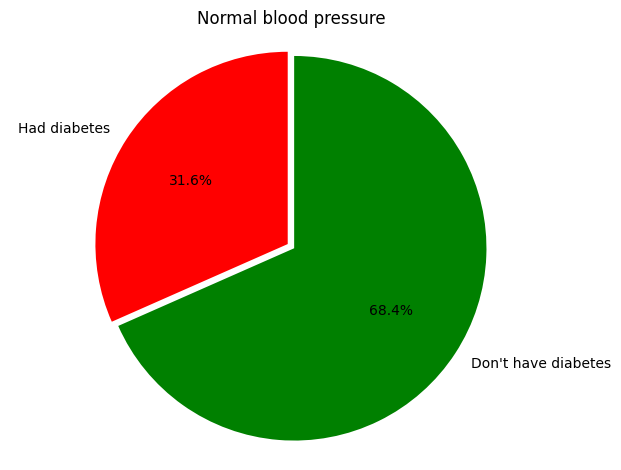

In [14]:
# Calculate the percentage of patients with and without diabetes among those having normal blood pressure
positive = ((dbts['BloodPressure_Category']=='Normal') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BloodPressure_Category']=='Normal') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('Normal blood pressure')

plt.tight_layout()
plt.show()

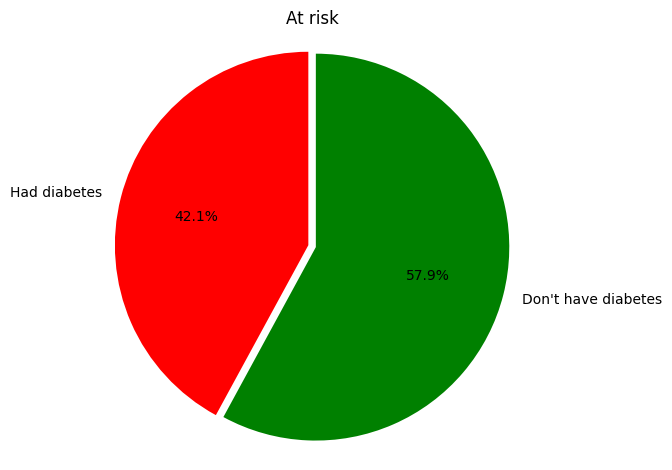

In [15]:
# Calculate the percentage of patients with and without diabetes among those having blood pressure at risk
positive = ((dbts['BloodPressure_Category']=='At risk') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BloodPressure_Category']=='At risk') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('At risk')

plt.tight_layout()
plt.show()

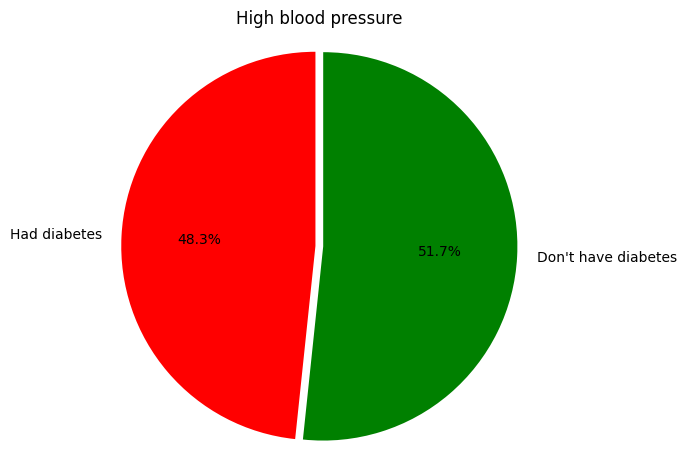

In [16]:
# Calculate the percentage of patients with and without diabetes among those having high blood pressure
positive = ((dbts['BloodPressure_Category']=='High blood pressure') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BloodPressure_Category']=='High blood pressure') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('High blood pressure')

plt.tight_layout()
plt.show()

From the pie charts above, the percentages of diabetic patients among each blood pressure levels are:
- Normal: 31.6%
- At risk: 42.1%
- **High: 48.3%**
<br/>
<br/>It is noticeable that among high blood pressure people, nearly half of them had diabetes, or, 1 in every 2 people with high blood pressure will have diabetes. This figure (the portion of high blood pressure people with diabetes) is the highest among all levels of blood pressure.<br/>
Hence, people with **high blood pressure** are **more prone** to diabetes

#### Question 4. Are obese people prone to diabetes? (BMI > 30)

##### Rules to divide BMI range
- BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- **30 <= BMI then “Obese”**

In [17]:
def BMI_categorize(x):
    '''
    this function will return the BMI category value for each record based on its corresponding BMI value
    input: values in column BMI in dbts data frame
    output: corresponding BMI category
    '''
    if x < 18.5: return 'Underweight'
    if 18.5 <= x < 25: return 'Normal'
    if 25 <= x < 30: return 'Overweight'
    if 30 <= x: return 'Obese'

dbts['BMI_Cateogry'] = dbts['BMI'].apply(BMI_categorize)
dbts['BMI_Cateogry']

0           Obese
1      Overweight
2          Normal
3      Overweight
4           Obese
          ...    
763         Obese
764         Obese
765    Overweight
766         Obese
767         Obese
Name: BMI_Cateogry, Length: 768, dtype: object

Instead of comparing the number of diabetic patients among all BMI levels, I calculated the percentage of diabetic patients in each BMI level and compared them altogether. This will eliminate the possible bias in the dataset.<br/>
All pie charts will be generated, the insight will be included after the last chart.<br/>
Let's start with underweight patients

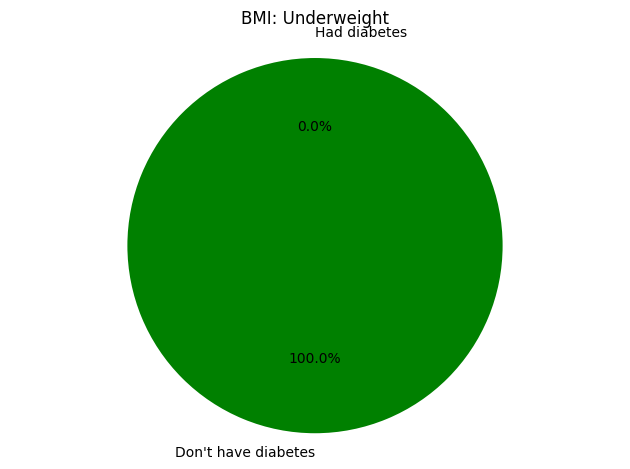

In [18]:
# Calculate the percentage of patients with and without diabetes among those having BMI as Underweight
positive = ((dbts['BMI_Cateogry']=='Underweight') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BMI_Cateogry']=='Underweight') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('BMI: Underweight')

plt.tight_layout()
plt.show()

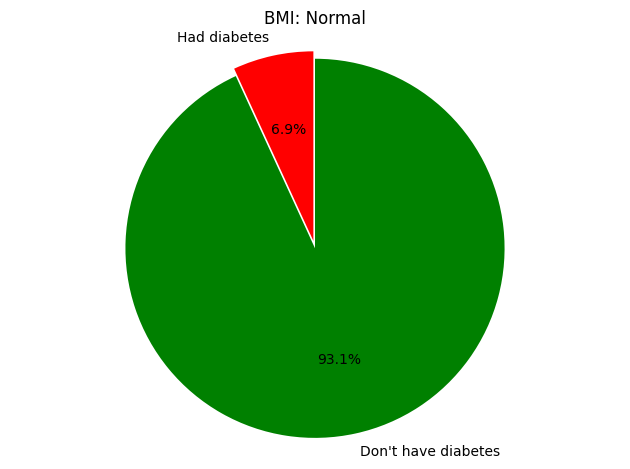

In [19]:
# Calculate the percentage of patients with and without diabetes among those having BMI as Normal
positive = ((dbts['BMI_Cateogry']=='Normal') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BMI_Cateogry']=='Normal') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('BMI: Normal')

plt.tight_layout()
plt.show()

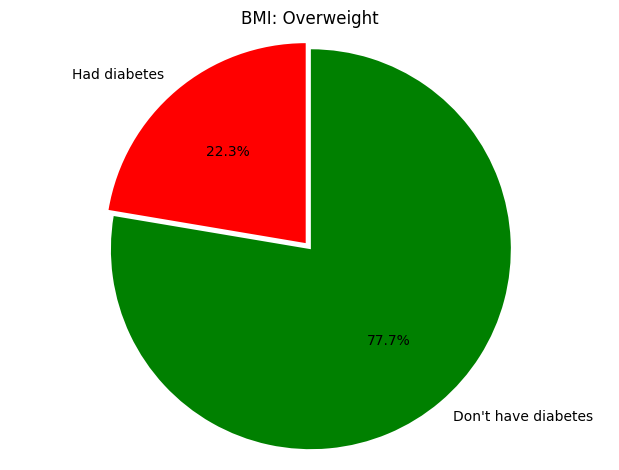

In [20]:
# Calculate the percentage of patients with and without diabetes among those having BMI as Overweight
positive = ((dbts['BMI_Cateogry']=='Overweight') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BMI_Cateogry']=='Overweight') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('BMI: Overweight')

plt.tight_layout()
plt.show()

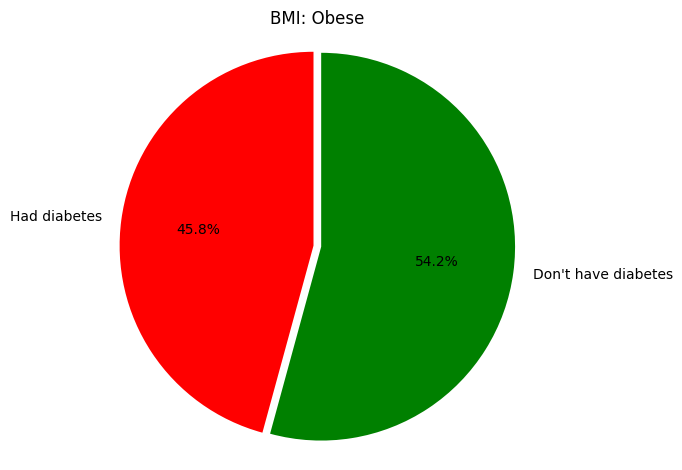

In [21]:
# Calculate the percentage of patients with and without diabetes among those having BMI as Obese
positive = ((dbts['BMI_Cateogry']=='Obese') & (dbts['Outcome']==1)).sum()
negative = ((dbts['BMI_Cateogry']=='Obese') & (dbts['Outcome']!=1)).sum()

proportion = [positive, negative]
label = ['Had diabetes', 'Don\'t have diabetes']

plt.pie(proportion, 
        labels = label,
        shadow = False,
        colors = ['red', 'green'],
        explode = (0.02, 0.02),
        startangle = 90,
        autopct = '%1.1f%%'
       )

plt.axis('equal')

plt.title('BMI: Obese')

plt.tight_layout()
plt.show()


From the pie charts above, the percentages of diabetic patients among each BMI levels are:
- Underweight: 0%
- Normal: 6.9%
- Overweight: 22.3%
- **Obese: 45.8%**
<br/>
<br/>It is noticeable that nearly half of obese people had diabetes. Another pattern seen is that: the further in the BMI range one is at, the more possibility of diabetes one will have.<br/>
Hence, people with high BMI index, especially **obese people (BMI > 30) are more prone** to diabetes